In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow import math

import matplotlib.pyplot as plt
import numpy as np
from utils import auc, load_dataset, plot_roc, train

In [2]:
def schedule(epoch, lr) -> float:
    if epoch >= 200 and epoch % 25 == 0:
        lr = lr * math.exp(-0.1)
    return lr

In [3]:
scheduler = LearningRateScheduler(schedule)
es = EarlyStopping(monitor='loss', patience=15, verbose=1)

# optimizer = RMSprop(ExponentialDecay(0.01, decay_steps=100000, decay_rate=0.1))
optimizer = Adam(lr=1e-3)
epochs = 500

In [4]:
clear_session()

model = Sequential([
                    Bidirectional(LSTM(1, dropout=0.3), input_shape=(4, 1000)),
                    Dense(4, activation='relu'),
                    Dropout(0.5),
                    Dense(1, activation='relu')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 2)                 8016      
_________________________________________________________________
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 8,033
Trainable params: 8,033
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
3125/3125 [==============================] - 7s 2ms/step - loss: 18767128.0000 - val_loss: 18100644.0000 - lr: 0.0010
Epoch 2/500
3125/3125 [==============================] - 7s 2ms/step - loss: 18185068.0000 - val_loss: 17388514.0000 - lr: 0.0010
Epoch 3/500
3125/3125 [==============================] - 7s 2ms/step - loss: 17407640.0000 - val_loss: 16615224.0000 - lr: 0.0010
Epoch 4/500
3125/3125 [==============================] - 7s 2ms/step - loss: 16681358.0000 - val_loss: 15999322.0000 - lr: 0.0010
Epoch 5/500
3125/3125 [==============================] - 7s 2ms/step - loss: 16178642.0000 - val_loss: 15651262.0000 - lr: 0.0010
Epoch 6/500
3125/3125 [==============================] - 7s 2ms/step - loss: 15938956.0000 - val_loss: 15527577.0000 - lr: 0.0010
Epoch 7/500
3125/3125 [==============================] - 7s 2ms/step - loss: 15865833.0000 - val_loss: 15502243.0000 - lr: 0.0010
Epoch 8/500
3125/3125 [==============================] - 7s 2ms/step - loss: 15848703.0000

3125/3125 [==============================] - 7s 2ms/step - loss: 15562344.0000 - val_loss: 15794962.0000 - lr: 0.0010
Epoch 64/500
3125/3125 [==============================] - 7s 2ms/step - loss: 15571188.0000 - val_loss: 15776383.0000 - lr: 0.0010
Epoch 65/500
3125/3125 [==============================] - 7s 2ms/step - loss: 15556995.0000 - val_loss: 15785322.0000 - lr: 0.0010
Epoch 66/500
3125/3125 [==============================] - 7s 2ms/step - loss: 15571877.0000 - val_loss: 15797915.0000 - lr: 0.0010
Epoch 67/500
3125/3125 [==============================] - 7s 2ms/step - loss: 15551888.0000 - val_loss: 15780420.0000 - lr: 0.0010
Epoch 68/500
3125/3125 [==============================] - 7s 2ms/step - loss: 15547122.0000 - val_loss: 15833548.0000 - lr: 0.0010
Epoch 69/500
3125/3125 [==============================] - 7s 2ms/step - loss: 15555671.0000 - val_loss: 15811684.0000 - lr: 0.0010
Epoch 70/500
3125/3125 [==============================] - 7s 2ms/step - loss: 15536435.0000 - va

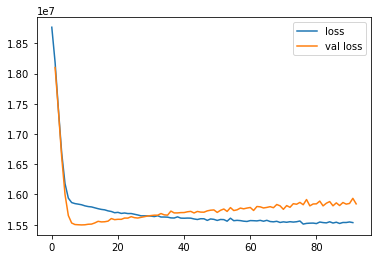

Training time: 10.60 minutes


In [5]:
model = train(load_dataset('m2'), model, epochs, optimizer, verbose=1, callbacks=[es, scheduler])

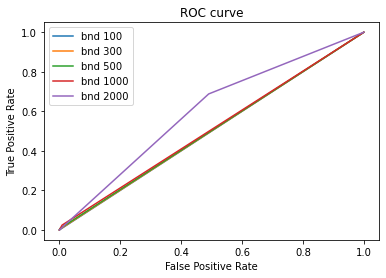

In [6]:
X_train, y_train, X_test, y_test = load_dataset('m2')

plot_roc(y_train, model.predict(X_train), [100, 300, 500, 1000, 2000])